In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# 设置随机种子以确保结果可重复
np.random.seed(42)

In [3]:
# 模拟参数
num_neurons = 300  # 神经元数量
num_trials = 100   # 运动方向的试次数量
angle_range = np.linspace(0, 2 * np.pi, num_trials)  # 运动方向从 0 到 2π
noise_level = 0.1  # 噪声水平

In [4]:
# 定义神经元的基础放电频率和调制幅度
baseline_firing_rates = np.random.uniform(5, 15, num_neurons)  # 每个神经元的基础放电频率
modulation_amplitudes = np.random.uniform(5, 10, num_neurons)  # 每个神经元的调制幅度
preferred_directions = np.random.uniform(0, 2 * np.pi, num_neurons)  # 偏好方向

In [5]:
# 存储所有神经元的放电活动
neural_responses = np.zeros((num_neurons, num_trials))

# 计算每个神经元的放电活动
for i in range(num_neurons):
    for j, angle in enumerate(angle_range):
        # 余弦调制模型 + 噪声
        firing_rate = (baseline_firing_rates[i] + 
                       modulation_amplitudes[i] * np.cos(angle - preferred_directions[i]) +
                       np.random.normal(0, noise_level))
        neural_responses[i, j] = firing_rate

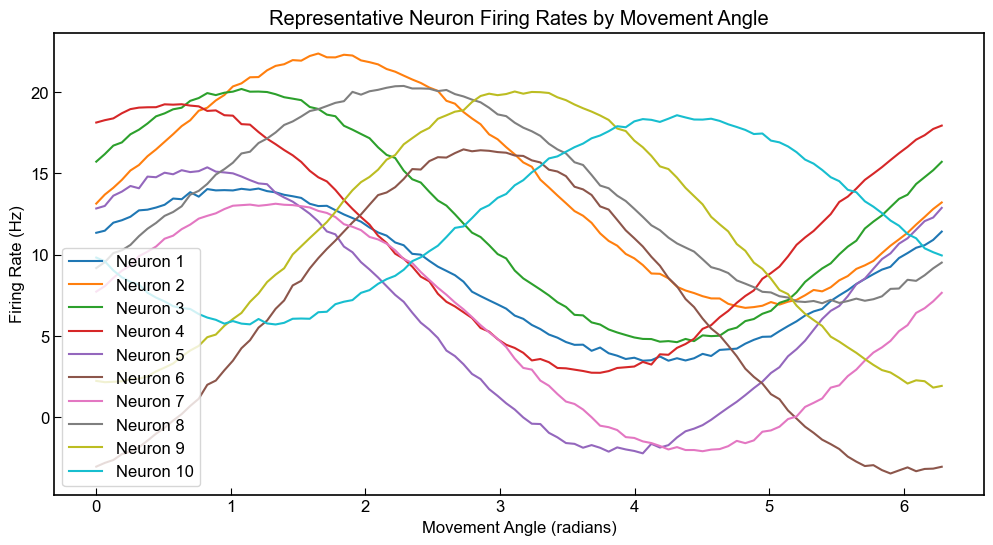

In [33]:
# 可视化部分神经元的放电活动
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.plot(angle_range, neural_responses[i, :], label=f'Neuron {i+1}')
plt.xlabel('Movement Angle (radians)')
plt.ylabel('Firing Rate (Hz)')
plt.title('Representative Neuron Firing Rates by Movement Angle')
plt.legend()
plt.show()

平均偏差: 0.001 弧度


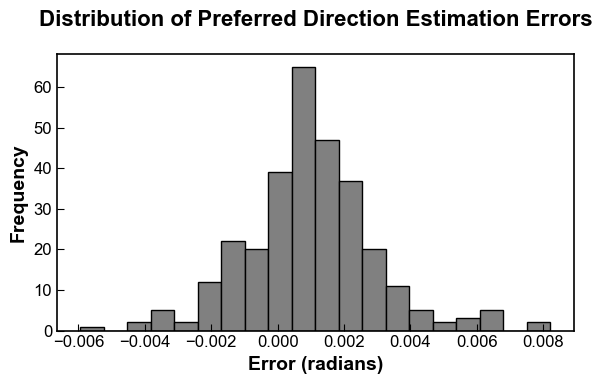

In [35]:
# 使用线性回归推测神经元的偏好方向
estimated_directions = np.zeros(num_neurons)
X = np.vstack((np.cos(angle_range), np.sin(angle_range))).T  # 余弦和正弦分量
for i in range(num_neurons):
    y = neural_responses[i, :]
    model = LinearRegression().fit(X, y)  # 拟合模型
    estimated_direction = np.arctan2(model.coef_[1], model.coef_[0])  # 偏好方向角度
    estimated_directions[i] = estimated_direction

# 结果分析
error = np.abs(estimated_directions - preferred_directions)
error = np.where(error > np.pi, 2 * np.pi - error, error)  # 处理周期边界情况
mean_error = np.mean(error)

print(f'平均偏差: {mean_error:.3f} 弧度')

# 结果讨论


# 绘制误差直方图
plt.hist(error, bins=20, color='gray', edgecolor='black')

# 添加标签和标题，修改直方图样式
plt.xlabel('Error (radians)', fontsize=14, weight='bold')
plt.ylabel('Frequency', fontsize=14, weight='bold')
plt.title('Distribution of Preferred Direction Estimation Errors', fontsize=16, weight='bold', pad=20)

plt.style.use('default')
plt.figure(figsize=(6, 4))
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'Arial',               # 使用 Arial 字体
    'axes.edgecolor': 'black',             # 坐标轴颜色
    'axes.linewidth': 1.2,                 # 坐标轴线条宽度
    'xtick.major.size': 5,                 # x轴主刻度长度
    'ytick.major.size': 5,                 # y轴主刻度长度
    'xtick.minor.size': 3,                 # x轴次刻度长度
    'ytick.minor.size': 3,                 # y轴次刻度长度
    'xtick.direction': 'in',               # 刻度线向内
    'ytick.direction': 'in',               # 刻度线向内
    'axes.grid': False,                    # 去掉网格线
})

plt.tight_layout()  # 避免标签重叠
plt.show()

In [15]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 设置 SimHei 字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 或者使用 ['Microsoft YaHei'] 等其他支持中文的字体
plt.rcParams['axes.unicode_minus'] = False  # 避免负号显示为方块

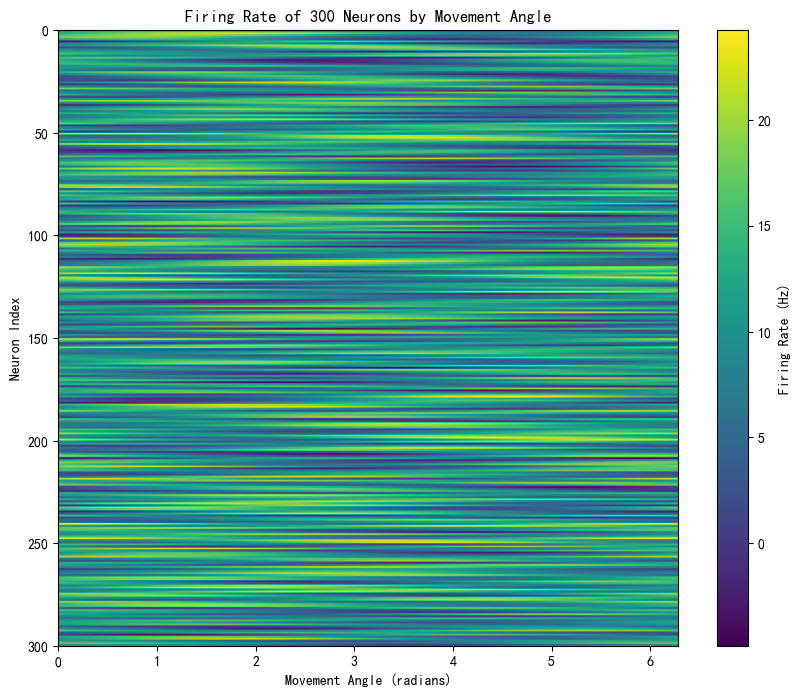

In [19]:
# 可视化所有神经元的放电活动
plt.figure(figsize=(10, 8))
plt.imshow(neural_responses, aspect='auto', cmap='viridis', extent=[0, 2*np.pi, num_neurons, 0])
plt.colorbar(label='Firing Rate (Hz)')
plt.xlabel('Movement Angle (radians)')
plt.ylabel('Neuron Index')
plt.title('Firing Rate of 300 Neurons by Movement Angle')
plt.show()